In [40]:
import yfinance as yf

# Get historical data for a specific stock (in this case, Apple)
stock = yf.Ticker("MSFT")

# Get the historical data for the past year (from 2022-05-01 to 2021-05-01)
start_date = "2007-05-01"
end_date = "2023-04-30"
df = stock.history(start=start_date, end=end_date)
df.index = df.index.strftime('%Y-%m-%d')
df = df.reset_index().rename(columns={"Date": "Date"})
# Print the data
print(df.head())

df.to_csv('MSFT.csv', index=False)

         Date       Open       High        Low      Close     Volume  \
0  2007-05-01  21.705840  22.053829  21.676841  22.039330   73539300   
1  2007-05-02  22.032080  22.249574  21.966832  22.191576   80686700   
2  2007-05-03  22.184321  22.474312  22.133573  22.452562   82036800   
3  2007-05-04  22.242325  22.256825  21.959584  22.155327  104385900   
4  2007-05-07  22.126329  22.300324  22.097330  22.264074   59889100   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [41]:
import numpy as np

# for reproducibility of our results
np.random.seed(1234)

from datetime import date
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [42]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)      # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)     # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

In [43]:
def get_mape(y_true, y_pred): 
    """
    Compute Mean Absolute Percentage Error (MAPE)
    
    INPUT:
    y_true - actual variable
    y_pred - predicted variable
    
    OUTPUT:
    mape - Mean Absolute Percentage Error (%)
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    return mape

def get_rmse(y_true, y_pred):
    """
    Compute Root Mean Squared Error (RMSE)
    
    INPUT:
    y_true - actual variable
    y_pred - predicted variable
    
    OUTPUT:
    rmse - Root Mean Squared Error
    
    """
    rmse = np.sqrt(np.mean(np.power((y_true - y_pred),2)))
                   
    return rmse

In [44]:
import pandas as pd 

In [45]:
# read dataset
df = pd.read_csv('MSFT.csv')

In [46]:
# dataframe dimensions
df.shape

(4028, 8)

In [47]:
# column data types
df.dtypes

Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object

In [48]:
# display top 10 observations of the dataset
df.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2007-05-01,21.705840,22.053829,21.676841,22.039330,73539300,0.0,0.0
1,2007-05-02,22.032080,22.249574,21.966832,22.191576,80686700,0.0,0.0
2,2007-05-03,22.184321,22.474312,22.133573,22.452562,82036800,0.0,0.0
3,2007-05-04,22.242325,22.256825,21.959584,22.155327,104385900,0.0,0.0
4,2007-05-07,22.126329,22.300324,22.097330,22.264074,59889100,0.0,0.0
5,2007-05-08,22.242324,22.430818,22.169825,22.293072,60551700,0.0,0.0
6,2007-05-09,22.256821,22.423566,22.162573,22.314819,51735000,0.0,0.0
7,2007-05-10,22.242323,22.423567,22.133576,22.169825,55398600,0.0,0.0
8,2007-05-11,22.162575,22.459816,22.148075,22.394567,43425300,0.0,0.0
9,2007-05-14,22.358316,22.467062,22.336566,22.452562,70188500,0.0,0.0


In [49]:
df.tail(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
4018,2023-04-17,289.929993,291.600006,286.160004,288.799988,23836200,0.0,0.0
4019,2023-04-18,291.570007,291.760010,287.010010,288.369995,20161800,0.0,0.0
4020,2023-04-19,285.989990,289.049988,284.540009,288.450012,17150300,0.0,0.0
4021,2023-04-20,285.250000,289.029999,285.079987,286.109985,23244400,0.0,0.0
4022,2023-04-21,285.010010,286.269989,283.059998,285.760010,21676400,0.0,0.0
4023,2023-04-24,282.089996,284.950012,278.720001,281.769989,26611000,0.0,0.0
4024,2023-04-25,279.510010,281.600006,275.369995,275.420013,45772200,0.0,0.0
4025,2023-04-26,296.700012,299.570007,292.730011,295.369995,64599200,0.0,0.0
4026,2023-04-27,295.970001,305.200012,295.250000,304.829987,46462600,0.0,0.0
4027,2023-04-28,304.010010,308.929993,303.309998,307.260010,36446700,0.0,0.0


In [50]:
# sumarize numerical features
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4028.000000,4028.000000,4028.000000,4028.000000,4.028000e+03,4028.000000,4028.0
mean,85.777268,86.654022,84.874212,85.807226,4.339651e+07,0.005223,0.0
std,88.777445,89.732948,87.778146,88.808414,2.674992e+07,0.046485,0.0
min,11.413914,11.729299,11.166112,11.376369,7.425600e+06,0.000000,0.0
25%,22.222689,22.423567,22.030901,22.234270,2.532460e+07,0.000000,0.0
50%,40.523843,40.859680,40.203421,40.551283,3.585165e+07,0.000000,0.0
75%,119.390925,120.735663,118.799326,120.066860,5.334000e+07,0.000000,0.0
max,340.567792,345.558430,338.176258,339.075531,3.193179e+08,0.680000,0.0


In [51]:
# Drop duplicates
df = df.drop_duplicates()
print(df.shape)

(4028, 8)


In [52]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [53]:
# sort by datetime
df.sort_values(by='Date', inplace=True, ascending=True)

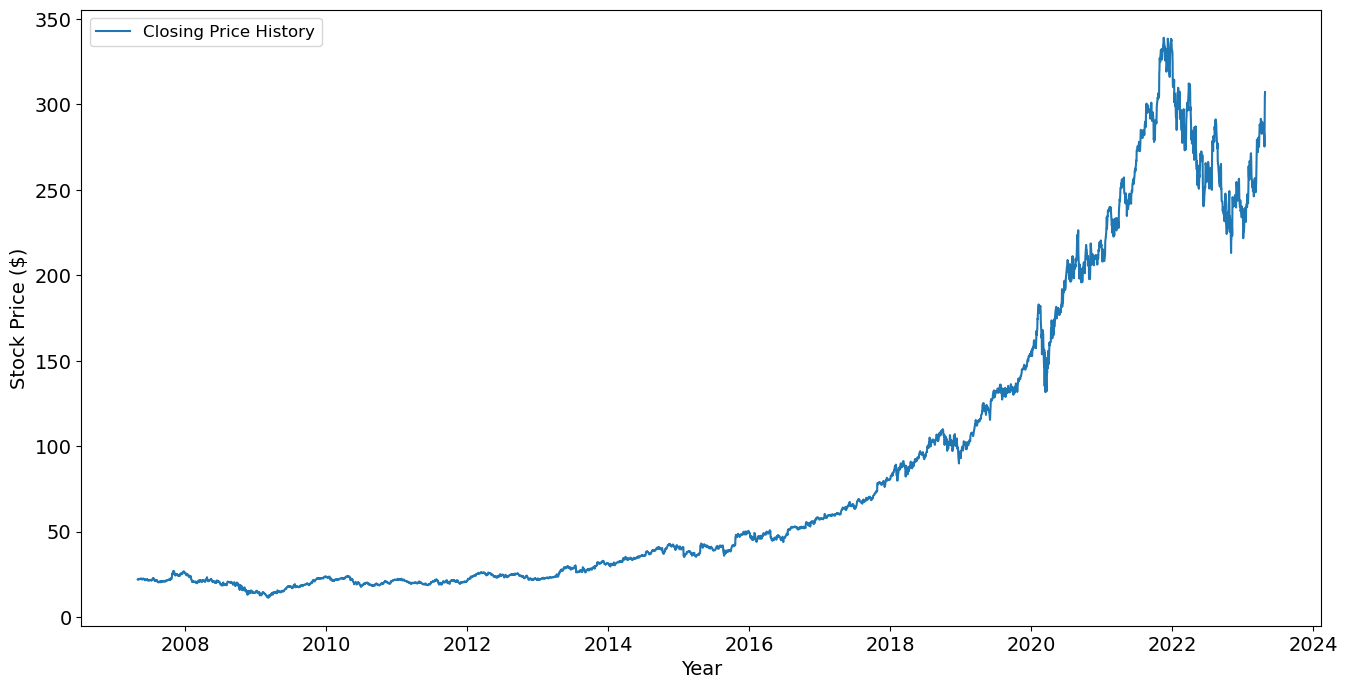

In [54]:
plt.figure(figsize = (16,8))
plt.plot(df['Date'], df['Close'], label = 'Closing Price History')
plt.legend(loc = "upper left")
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.show()

In [55]:
test_size = 0.2
training_size = 1 - test_size

test_num = int(test_size * len(df))
train_num = int(training_size * len(df))

print("train_num: " + str(train_num))
print("test_num: " + str(test_num))

train_num: 3222
test_num: 805


In [56]:
train = df[:train_num][['Date', 'Close']]
test = df[train_num:][['Date', 'Close']]

In [57]:
preds = []

for i in range(0, test.shape[0]):
    a = train['Close'][len(train) - test.shape[0] + i:].sum() + test['Close'][:i].sum()
    b = a/test.shape[0]
    preds.append(b)

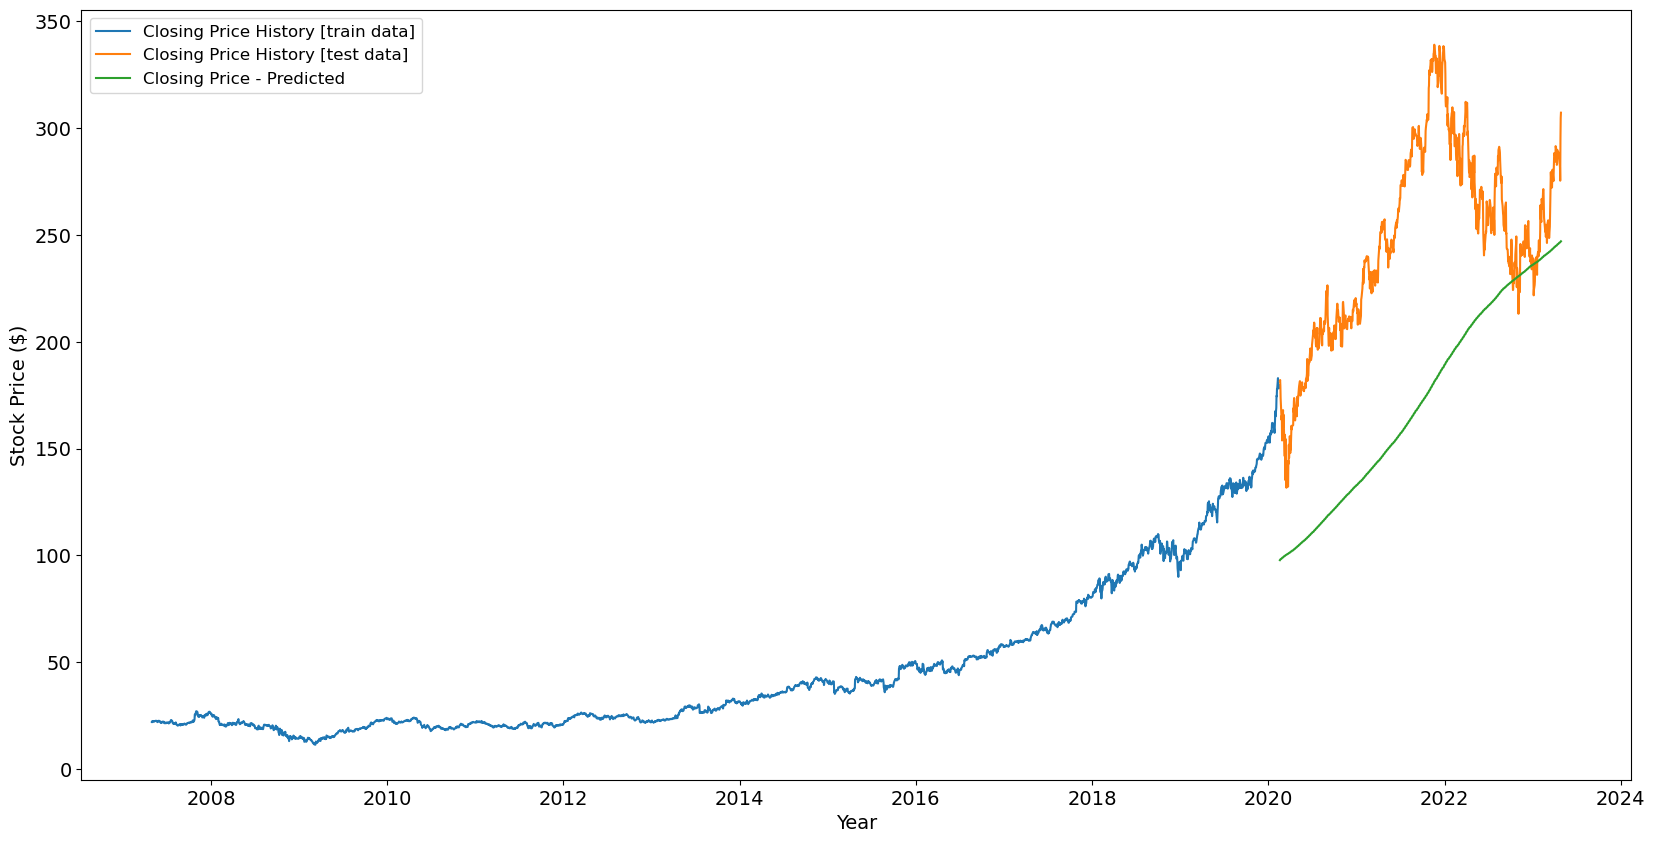

In [58]:
# Plot predicted price vs actual closing price 

test['Predictions_ma'] = preds
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.plot(train['Date'], train['Close'], label = 'Closing Price History [train data]')
plt.plot(test['Date'], test['Close'], label = 'Closing Price History [test data]')
plt.plot(test['Date'], test['Predictions_ma'], label = 'Closing Price - Predicted')
plt.legend(loc = "upper left")
plt.show()

In [59]:
# Evaluate performance
rmse_ma = get_rmse(np.array(test['Close']), np.array(test['Predictions_ma']))
print('Root Mean Squared Error: ' + str(rmse_ma))
mape_ma = get_mape(np.array(test['Close']), np.array(test['Predictions_ma']))
print('Mean Absolute Percentage Error (%): ' + str(mape_ma))

Root Mean Squared Error: 84.5913487550106
Mean Absolute Percentage Error (%): 30.48312185569273


In [60]:
# scale our dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Close']])
scaled_data_train = scaled_data[:train.shape[0]]

In [61]:
# create a useful function to split our data into X and y

def get_x_y(data, N, offset):
    """
    Split data into input variable (X) and output variable (y)
    
    INPUT:
    data - dataset to be splitted
    N - time frame to be used
    offset - position to start the split
    
    OUTPUT:
    X - input variable
    y - output variable
    """
    X, y = [], []
    
    for i in range(offset, len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    
    X = np.array(X)
    y = np.array(y)
    
    return X, y

In [62]:
# we use past 60 days stock prices for our training to predict 61th day's closing price.

X_train, y_train = get_x_y(scaled_data_train, 60, 60)

In [63]:
# initial LSTM parameters
lstm_units = 50 
optimizer = 'adam'
epochs = 1
batch_size = 1

model = Sequential()
model.add(LSTM(units = lstm_units, return_sequences = True, input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = lstm_units))
model.add(Dense(1))

In [64]:
# Compile and fit the LSTM network
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 2)

3162/3162 - 75s - loss: 1.8189e-04 - 75s/epoch - 24ms/step


In [65]:
# predict stock prices using past 60 stock prices
inputs = df['Close'][len(df) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

C:\Users\Suhail Yousuf\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


26/26 [==============================] - 2s 15ms/step


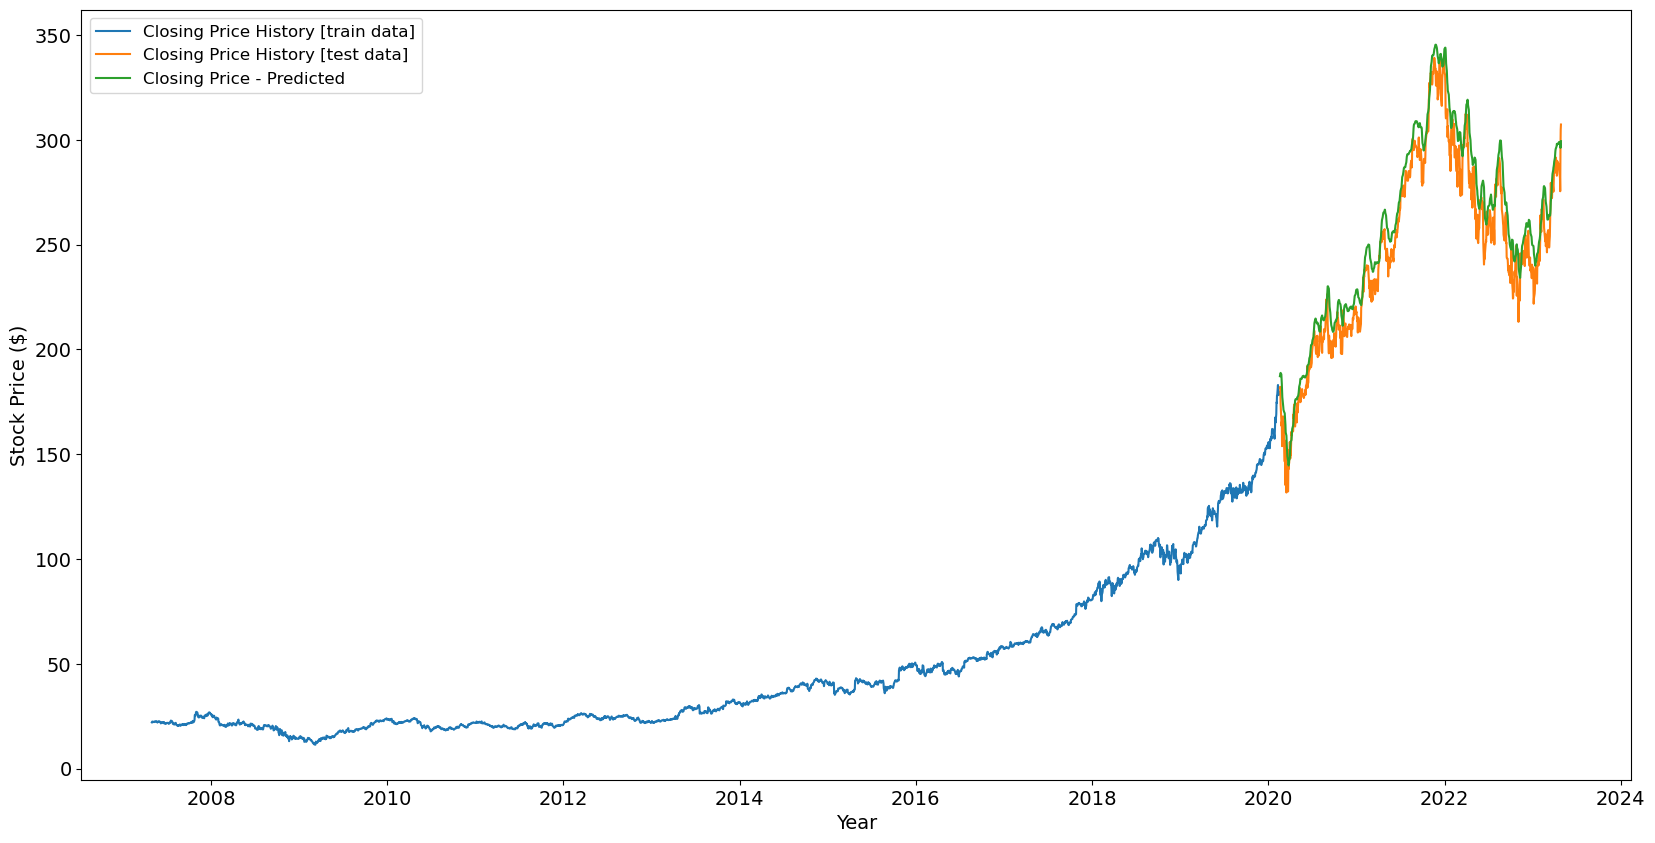

In [66]:
# Plot predicted price vs actual closing price 

test['Predictions_lstm'] = closing_price
plt.figure(figsize = (20,10))
plt.xlabel('Year')
plt.ylabel('Stock Price ($)')
plt.plot(train['Date'], train['Close'], label = 'Closing Price History [train data]')
plt.plot(test['Date'], test['Close'], label = 'Closing Price History [test data]')
plt.plot(test['Date'], test['Predictions_lstm'], label = 'Closing Price - Predicted')
plt.legend(loc = "upper left")
plt.show()

In [67]:
# Evaluate performance
rmse_lstm = get_rmse(np.array(test['Close']), np.array(test['Predictions_lstm']))
mape_lstm = get_mape(np.array(test['Close']), np.array(test['Predictions_lstm']))
print('Root Mean Squared Error: ' + str(rmse_lstm))
print('Mean Absolute Percentage Error (%): ' + str(mape_lstm))

Root Mean Squared Error: 12.427480896476943
Mean Absolute Percentage Error (%): 4.3351336222487395


In [68]:
d = {'Metric':['RMSE','MAPE (%)'],
     'Moving Average': [rmse_ma, mape_ma],
     'LSTM': [rmse_lstm, mape_lstm]
    
}

comp_table = pd.DataFrame(d)
comp_table

,Metric,Moving Average,LSTM
0,RMSE,84.591349,12.427481
1,MAPE (%),30.483122,4.335134


In [69]:
# create, compile and fit LSTM netork.
def fit_lstm(X_train, y_train, lstm_units = 50, optimizer = 'adam', epochs = 1, 
             batch_size = 1, loss = 'mean_squared_error'):
    """
    INPUT:
    X_train - training input variables (X)
    y_train - training output variable (y)
    
    default(initial) parameters chosen for LSTM
    --------------------------------------------
    lstm_units = 50
    optimizer = 'adam'
    epochs = 1
    batch_size = 1
    loss = 'mean_squared_error'
    
    OUTPUT:
    model - fitted model
    """
    model = Sequential()
    model.add(LSTM(units = lstm_units, return_sequences = True, input_shape = (X_train.shape[1],1)))
    model.add(LSTM(units = lstm_units))
    model.add(Dense(1))
    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, verbose = 1)
    # verbose changed to 1 to show the animated progress...
    return model

# predict stock price using past 60 stock prices
def get_pred_closing_price(df, scaler, model):
    """
    INPUT:
    df - dataframe that has been preprocessed
    scaler - instantiated object for MixMaxScaler()
    model - fitted model
    
    OUTPUT:
    closing_price - predicted closing price using fitted model
    """
    inputs = df['Close'][len(df) - len(test) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs = scaler.transform(inputs)

    X_test = []
    for i in range(60, inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    return closing_price

# evaluate model performance
def model_performance(test, closing_price):
    """
    INPUT:
    test - test dataset that contains only 'Date' & 'Close' columns (i.e.test = df[train_num:][['Date', 'Close']])
    closing_price - predicted closing price using fitted model
    
    OUTPUT:
    rmse_lstm - RMSE for LSTM
    mape_lstm - MAPE(%) for LSTM
    """
    test['Predictions_lstm_tuned'] = closing_price
    rmse_lstm = get_rmse(np.array(test['Close']), np.array(test['Predictions_lstm_tuned']))
    mape_lstm = get_mape(np.array(test['Close']), np.array(test['Predictions_lstm_tuned']))
    print('Root Mean Squared Error: ' + str(rmse_lstm))
    print('Mean Absolute Percentage Error (%): ' + str(mape_lstm))
    return rmse_lstm, mape_lstm

# train, predict, evaluate model
def train_pred_eval_model(X_train, y_train, df, scaler, test, 
                          lstm_units = 50, optimizer = 'adam', epochs = 1, 
                          batch_size = 1, loss = 'mean_squared_error'):
    """
    INPUT:
    X_train - training input variables (X)
    y_train - training output variable (y)
    df - dataframe that has been preprocessed
    scaler - instantiated object for MixMaxScaler()
    test - test dataset that contains only 'Date' & 'Close' columns (i.e.test = df[train_num:][['Date', 'Close']])
    
    default(initial) parameters chosen for LSTM
    --------------------------------------------
    lstm_units = 50
    optimizer = 'adam'
    epochs = 1
    batch_size = 1
    loss = 'mean_squared_error'
    
    OUTPUT:
    rmse_lstm - RMSE for LSTM
    mape_lstm - MAPE(%) for LSTM    
    """
    model_tuned = fit_lstm(X_train, y_train, int(lstm_units), optimizer, int(epochs), 
             int(batch_size), loss)
    closing_price_tuned = get_pred_closing_price(df, scaler, model_tuned)
    rmse_lstm, mape_lstm = model_performance(test, closing_price_tuned)
    return rmse_lstm, mape_lstm

In [70]:
!python train.py MSFT.csv model.pkl scaler.gz 0.2 60 60

python: can't open file 'C:\\Users\\Suhail Yousuf\\project finalle\\train.py': [Errno 2] No such file or directory


In [71]:
!python predictor.py model.pkl scaler.gz MSFT.csv

python: can't open file 'C:\\Users\\Suhail Yousuf\\project finalle\\predictor.py': [Errno 2] No such file or directory
